In [9]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2

localpath = "C:/Users/Zak/Documents/Code/AIChan/imgGan/CipherGan"
shapeSizex = 512
shapeSizey = 512
datasetSize= 30
train_size = int(datasetSize/2)
test_size = int(datasetSize/2)
batch_size = 6
num_examples_to_generate = 6
epochs = 150
latent_dim = 2

In [17]:
anim_file = 'genimg/cvae22.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('genimg/image*.jpg')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
list_ = []
train_images=[]; test_images=[]

def read_img(img_list, img):
    n = cv2.imread(img, 0)
    img_list.append(n)
    return img_list

path = glob.glob(localpath+"/TestDataset/*.jpg") #or jpg
cv_image = [read_img(list_, img) for img in path]


for img in range(len(cv_image)):
    if img < test_size:
        train_images.append(cv_image[0][img])
    else:
        test_images.append(cv_image[0][img])
        
print(np.array(cv_image).shape,cv_image,cv_image[0],cv_image[0][0])
print(np.array(train_images).shape,train_images,train_images[0],train_images[0][0])

In [ ]:
# TODO: Save model, Plot its overal interpolation
def plot_latent_images(model, n, digit_size=shapeSize):
  """Plots n x n digit images decoded from the latent space."""

  norm = tfp.distributions.Normal(0, 1)
  grid_x = norm.quantile(np.linspace(0.05, 0.95, n))
  grid_y = norm.quantile(np.linspace(0.05, 0.95, n))
  image_width = digit_size*n
  image_height = image_width
  image = np.zeros((image_height, image_width))

  for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
      z = np.array([[xi, yi]])
      x_decoded = model.sample(z)
      digit = tf.reshape(x_decoded[0], (digit_size, digit_size))
      image[i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size] = digit.numpy()

  plt.figure(figsize=(10, 10))
  plt.imshow(image, cmap='Greys_r')
  plt.axis('Off')
  plt.show()

  plot_latent_images(model, 20)

[]

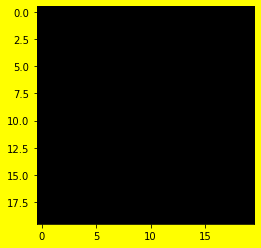

In [27]:
path = glob.glob(localpath+"/TestDataset/*.jpg") 
plt.imshow(np.zeros((20,20)), cmap='gray')
plt.rcParams['figure.facecolor'] = 'yellow'
plt.plot()